In [ ]:
# MLP Classifier for MNIST Handwritten Digits

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
# Function to load and preprocess data
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)

    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [14]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [15]:
# train the model
def train(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        verbose=1)
    return history

In [8]:
# plot accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [9]:
# visualize confusion matrix and classification report
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    report = classification_report(y_true, y_pred_classes, digits=2)
    print("Classification Report:\n", report)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8073 - loss: 0.6168 - val_accuracy: 0.9628 - val_loss: 0.1219
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9588 - loss: 0.1358 - val_accuracy: 0.9678 - val_loss: 0.1082
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9690 - loss: 0.0980 - val_accuracy: 0.9754 - val_loss: 0.0840
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9760 - loss: 0.0783 - val_accuracy: 0.9745 - val_loss: 0.0828
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9826 - loss: 0.0571 - val_accuracy: 0.9743 - val_loss: 0.0852
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9839 - loss: 0.0499 - val_accuracy: 0.9758 - val_loss: 0.0876
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9843 - loss: 0.0470 - val_accuracy: 0.9768 - val_loss: 0.0836
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9873 - loss: 0.0396 - val_ac

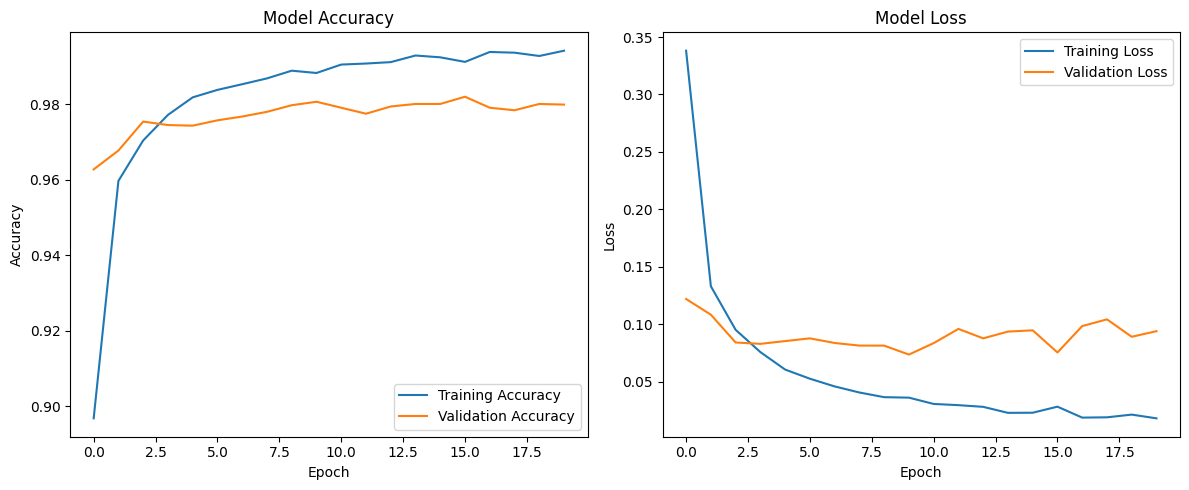

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


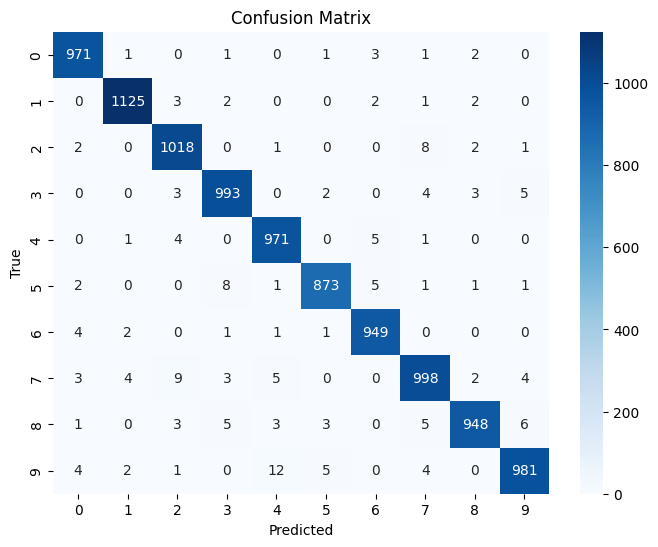

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [16]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
model = create_model()
history = train(model, x_train, y_train, x_test, y_test)
plot_history(history)
evaluate_model(model, x_test, y_test)

In [17]:
# MLP Classifier for CIFAR-10 Dataset

In [2]:
# load and preprocess data
def load_and_preprocess_data():
    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Reshape images to 32x32x3 arrays (no need to flatten for MLP if input shape matches 32x32x3)
    # Note: For MLP input, we need to flatten it to (32*32*3)
    x_train = x_train.reshape(-1, 32 * 32 * 3)
    x_test = x_test.reshape(-1, 32 * 32 * 3)

    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [3]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_shape=(32 * 32 * 3,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# Function to train the model
def train(model, x_train, y_train):
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=10,
                        validation_split=0.2,
                        verbose=1)
    return history

In [5]:
# Function to plot accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
# evaluate and visualize the model performance
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    report = classification_report(y_true, y_pred_classes, digits=2)
    print("Classification Report:\n", report)

C:\Anaconda_Jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.1890 - loss: 2.2370 - val_accuracy: 0.3189 - val_loss: 1.8850
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.2972 - loss: 1.9201 - val_accuracy: 0.3595 - val_loss: 1.8095
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.3305 - loss: 1.8498 - val_accuracy: 0.3535 - val_loss: 1.8224
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.3358 - loss: 1.8289 - val_accuracy: 0.3861 - val_loss: 1.7494
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.3465 - loss: 1.8010 - val_accuracy: 0.3854 - val_loss: 1.7444
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.3559 - loss: 1.7842 - val_accuracy: 0.3886 - val_loss: 1.7358
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.3701 - loss: 1.7372 - val_accuracy: 0.3970 - val_loss: 1.6854
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.3669 - loss: 1.7503 - 

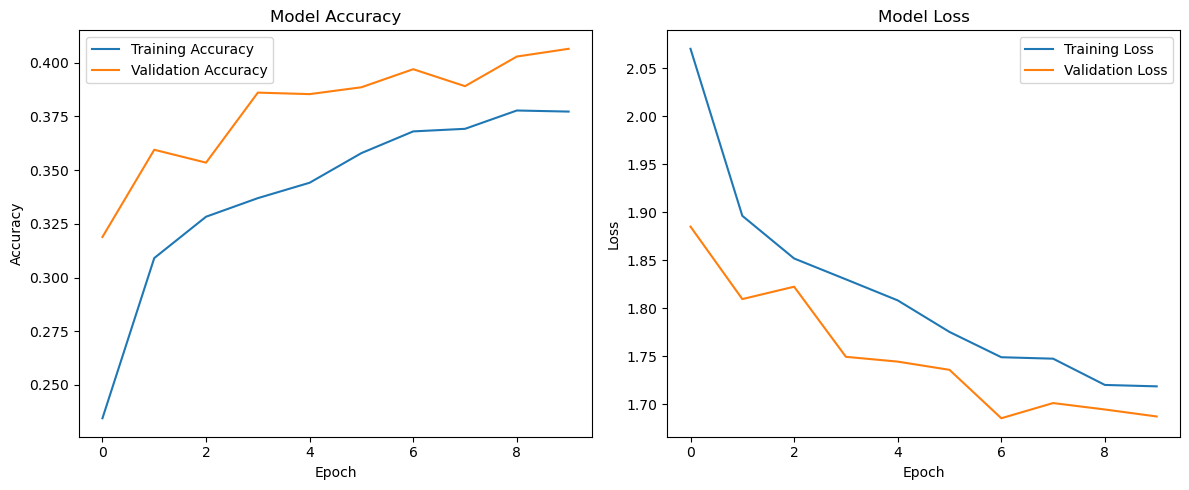

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


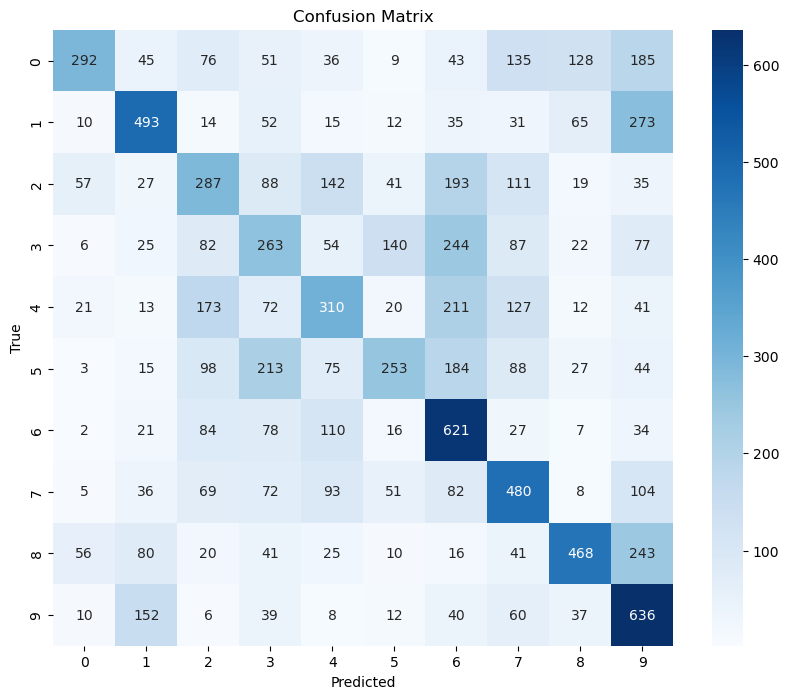

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.29      0.40      1000
           1       0.54      0.49      0.52      1000
           2       0.32      0.29      0.30      1000
           3       0.27      0.26      0.27      1000
           4       0.36      0.31      0.33      1000
           5       0.45      0.25      0.32      1000
           6       0.37      0.62      0.47      1000
           7       0.40      0.48      0.44      1000
           8       0.59      0.47      0.52      1000
           9       0.38      0.64      0.48      1000

    accuracy                           0.41     10000
   macro avg       0.43      0.41      0.40     10000
weighted avg       0.43      0.41      0.40     10000



In [7]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
model = create_model()
history = train(model, x_train, y_train)
plot_history(history)
evaluate_model(model, x_test, y_test)